## This version does the ZOGY but computes the kernels in fourier space, and then convolves images in real space.

Do it with new testing object.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

Use the code from `diffimTests.py`.

In [2]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varFlux2=1500., 
                         psf1=[1.8, 1.8], theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)

print dit.computeClippedImageStats(testObj.im1.im)
print dit.computeClippedImageStats(testObj.im2.im)
print dit.computeClippedImageStats(testObj.im1.var)
print dit.computeClippedImageStats(testObj.im2.var)

No module named utils
LSSTSW has not been set up.
No module named utils
LSSTSW has not been set up.
(0.081200232495767286, 17.148568853279848, -74.0, 1370.4380896438863)
(0.15851465540839035, 17.201589327732183, -82.0, 1131.5017745269811)
(300.08120023249586, 17.148568853279848, 226.0, 1670.4380896438863)
(300.1585146554084, 17.201589327732183, 218.0, 1431.5017745269811)


In [3]:
reload(dit)
testObj.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1)
print dit.computeClippedImageStats(testObj.D_AL.im)
D_ZOGY = testObj.doZOGY(inImageSpace=False)
testObj.doZOGY(inImageSpace=True)
print dit.computeClippedImageStats(testObj.D_ZOGY.im)

No module named utils
LSSTSW has not been set up.
(-0.0035202388127941998, 0.97553040412383563, -4.6351761079571494, 7.483130660824262)
(-0.00035590393954667535, 0.98685699663131554, -4.6828849900551637, 4.5309525334923411)


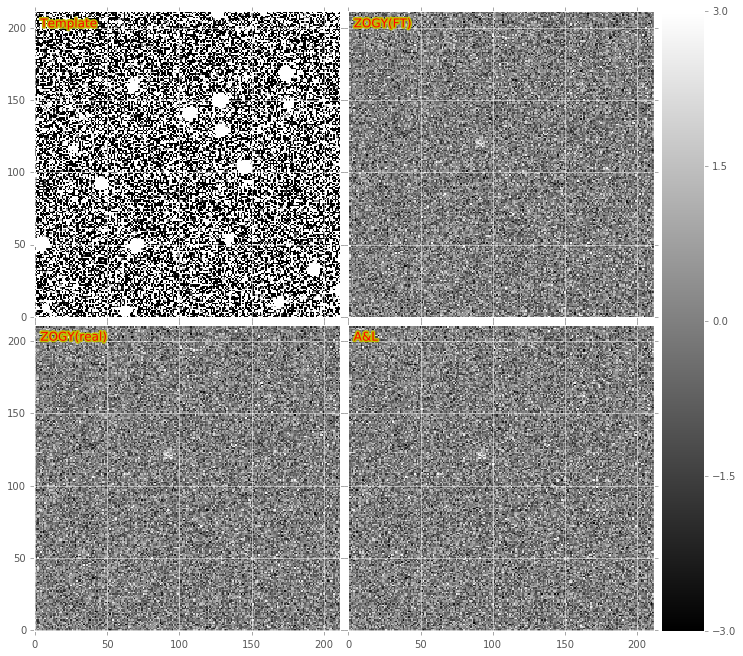

In [4]:
xim = np.arange(-256, 256, 1)
yim = xim.copy()

fig = plt.figure(1, (12, 12))
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
extent = (xim.min()+150, xim.max()-150, yim.min()+150, yim.max()-150)
dit.plotImageGrid((testObj.im1.im[x1d:x2d,y1d:y2d], 
                   D_ZOGY.im[x1d:x2d,y1d:y2d], 
                   testObj.D_ZOGY.im[x1d:x2d,y1d:y2d], 
                   testObj.D_AL.im[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY(FT)', 'ZOGY(real)', 'A&L'])

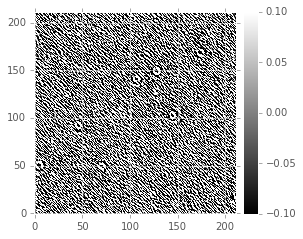

In [5]:
D = testObj.D_ZOGY.im.copy()
D_AL = testObj.D_AL.im.copy()

D[0,:] = D[:,0] = D[-1,:] = D[:,-1] = 0.
D_AL[D == 0] = 0.
fig = plt.figure(1, (4, 4))
dit.plotImageGrid(((D - D_AL)[x1d:x2d,y1d:y2d],), clim=(-0.1, 0.1))

Work on variance planes.

No module named utils
LSSTSW has not been set up.
(0.010786119078249957, 0.97830877244881809, -4.5000197762134651, 8.1269205107118125)
(6.7727155166613415e-05, 0.0058837459832925109, -0.026850233859417483, 0.050639357822524315)
[[  242.21750369   271.65070471     0.          1500.        ]] 8.07819583209
29


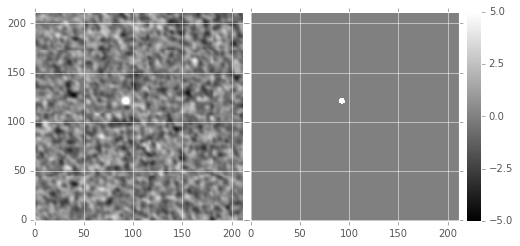

In [6]:
reload(dit);

S_corr, S = testObj.S_corr_ZOGY.im, testObj.S_ZOGY.im
print dit.computeClippedImageStats(S_corr)
print dit.computeClippedImageStats(S)
changedCentroid = testObj.centroids[testObj.changedCentroidInd, :]
print changedCentroid, S_corr[np.rint(changedCentroid[0,1]).astype(int), np.rint(changedCentroid[0,0]).astype(int)]
print (S_corr > 5.).sum() + (S_corr < -5.).sum()
fig = plt.figure(1, (8, 8))
dit.plotImageGrid((S_corr[x1d:x2d,y1d:y2d], ((S_corr > 5.)*5.0 + (S_corr < -5.)*-5.0)[x1d:x2d,y1d:y2d]), 
                  clim=(-5.,5.))

### Try the reverse case where science is narrower than template...

For A&L, turn on pre-filtering. Note that pre-filtering and decorrelation do not work well together. This is a known issue and needs to be addressed.

In [7]:
reload(dit)
testObj2 = testObj.clone()
testObj2.reverseImages()

testObj2.doZOGY()
dstats_ZOGY = dit.computeClippedImageStats(testObj2.D_ZOGY.im)
print dstats_ZOGY
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doPreConv=False)
print dit.computeClippedImageStats(testObj2.D_AL.im)
D_AL = testObj2.D_AL  # save the non-preconv-ed version
D_kappa = testObj2.kappa_AL
testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doDecorr=False, doPreConv=True)
print dit.computeClippedImageStats(testObj2.D_AL.im)
D_AL_noDecorr = testObj2.D_AL  # save the non-preconv-ed version
D_kappa_noDecorr = testObj2.kappa_AL
#testObj2.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, doDecorr=False, doPreConv=True)
#print dit.computeClippedImageStats(testObj2.D_AL.im)

No module named utils
LSSTSW has not been set up.
(0.00035590393954667535, 0.98685699663131554, -4.5309525334923411, 4.6828849900551637)
(-0.0043876181535046363, 0.96701036710470611, -4.8176526915826861, 13.047255186484227)
(-0.00075673026296116353, 0.15597530645458138, -1.3826238734628165, 2.5306675491032928)


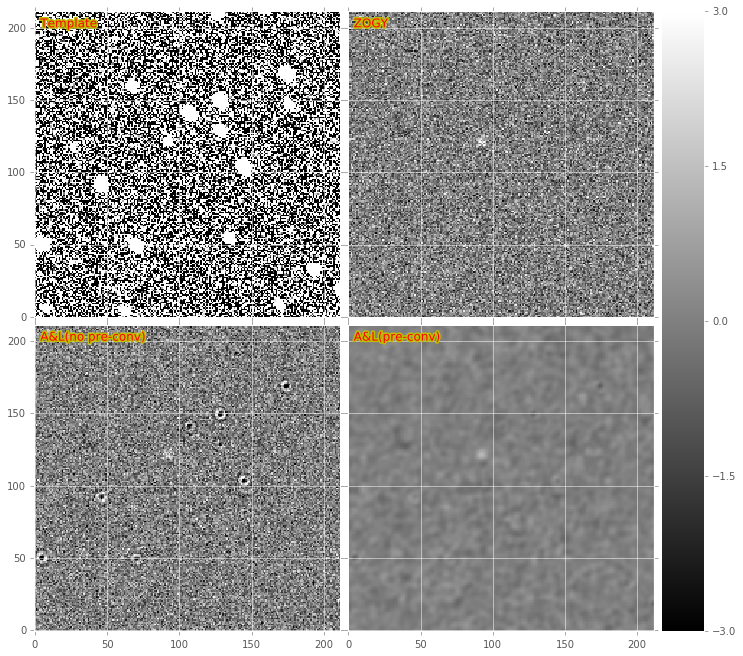

In [8]:
xim = yim = np.arange(-256, 256, 1)
fig = plt.figure(1, (12, 12))
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
extent = (xim.min()+150, xim.max()-150, yim.min()+150, yim.max()-150)
dit.plotImageGrid((testObj2.im1.im[x1d:x2d,y1d:y2d], -testObj2.D_ZOGY.im[x1d:x2d,y1d:y2d], 
                   -D_AL.im[x1d:x2d,y1d:y2d], -testObj2.D_AL.im[x1d:x2d,y1d:y2d]), 
                  clim=(-3,3), titles=['Template', 'ZOGY', 'A&L(no pre-conv)', 'A&L(pre-conv)'])

(-0.00075673026296116353, 0.15597530645458138, -1.3826238734628165, 2.5306675491032928)
(0.01224728258145933, 0.18196443003207491, -4.1864463622485273, 16.082958639433361)
140


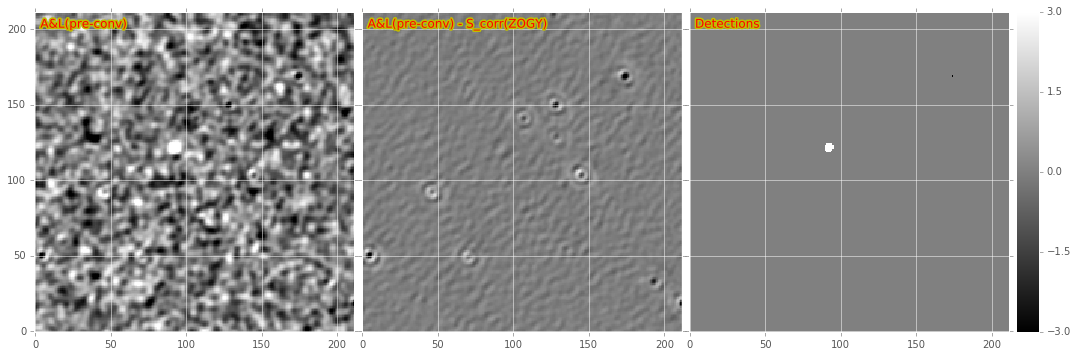

In [9]:
dstats = dit.computeClippedImageStats(testObj2.D_AL.im)
print dstats
#D_AL_pc_ALZC /= 3.0
tmp = (testObj2.D_AL.im - dstats[0]) / dstats[1]
print dit.computeClippedImageStats(tmp-testObj2.S_corr_ZOGY.im)
print (tmp > 5.).sum() + (tmp < -5.).sum()
fig = plt.figure(1, (18, 18))
dit.plotImageGrid((-tmp[x1d:x2d,y1d:y2d], -(tmp-testObj2.S_corr_ZOGY.im)[x1d:x2d,y1d:y2d], 
                   ((tmp > 5.)*-5. + (tmp < -5.)*5.)[x1d:x2d,y1d:y2d]), clim=(-3., 3.),
                 titles=['A&L(pre-conv)', 'A&L(pre-conv) - S_corr(ZOGY)', 'Detections'])

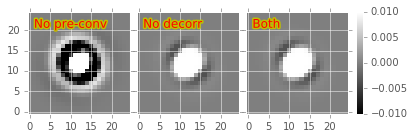

In [10]:
dit.plotImageGrid((D_kappa, D_kappa_noDecorr, testObj2.kappa_AL), titles=['No pre-conv', 'No decorr', 'Both'], 
                  clim=(-0.01,0.01))

## Do it in the stack!

In [11]:
reload(dit)

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., varFlux2=1500., 
                         psf1=[1.8, 1.8], theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)
testObj.doZOGY()
D = testObj.D_ZOGY.im.copy()
testObj.doAL(spatialKernelOrder=0, spatialBackgroundOrder=1, kernelSize=15)
D_AL = testObj.D_AL.im.copy()

No module named utils
LSSTSW has not been set up.


(300.08120023249586, 17.148568853279848, 226.0, 1670.4380896438863)
(-0.00066892023866064478, 0.98241660969124756, -4.6828849900551637, 4.5309525334923411)
(-0.003649200249148209, 0.97144278497969017, -4.6374332401714353, 7.5022026307781315)
(0.04034999, 23.999403, -111.37612, 104.9799)
(0.0016472813, 0.97977155, -4.5469112, 4.2857862)

(0.00098551771714792328, 0.35645327862209375, -1.7409820175482404, 2.4743400620202181)
(-0.0031918966244095705, 0.36313310863203235, -2.3960716017758492, 6.6342905643859034)
(-0.0049474613122415297, 0.12475960624505231, -1.926746626077493, 4.681171357271162)


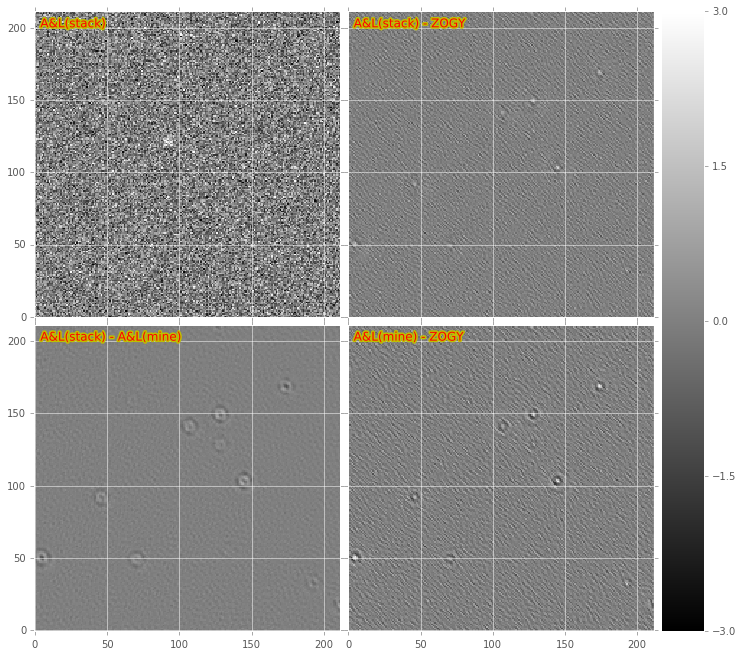

In [12]:
D[0,:] = D[:,0] = D[-1,:] = D[:,-1] = 0.
D_AL[D == 0] = 0.

result = testObj.doALInStack(doDecorr=True)
D_stack = result.decorrelatedDiffim.getMaskedImage().getImage().getArray()

print dit.computeClippedImageStats(testObj.im1.var)
tmp = result.matchedExposure.getMaskedImage().getVariance().getArray()
tmp[(D == 0) | np.isnan(tmp) | np.isinf(tmp)] = np.nan
var2 = dit.computeClippedImageStats(tmp)[0]
D_stack[(D == 0) | np.isnan(D_stack)] = np.nan

# D_stack is shifted again, so unshift it.
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(D_AL)
print dit.computeClippedImageStats(D_stack)
D_stack /= np.sqrt(testObj.im1.metaData['sky'] + testObj.im1.metaData['sky'])
print dit.computeClippedImageStats(D_stack)
print ""
print dit.computeClippedImageStats(D_stack-D)
print dit.computeClippedImageStats(D_AL-D)
print dit.computeClippedImageStats(D_AL-D_stack)
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((D_stack[x1d:x2d,y1d:y2d], (D_stack-D)[x1d:x2d,y1d:y2d], 
                (D_stack-D_AL)[x1d:x2d,y1d:y2d], (D_AL-D)[x1d:x2d,y1d:y2d]), 
                  titles=['A&L(stack)', 'A&L(stack) - ZOGY', 'A&L(stack) - A&L(mine)' ,'A&L(mine) - ZOGY'], 
                  clim=(-3,3))

Reverse the template and science image. Pre-convolution and decorrelation? Need to implement them myself since right now they are part of pipe_tasks, not ip_diffim.

No module named utils
LSSTSW has not been set up.


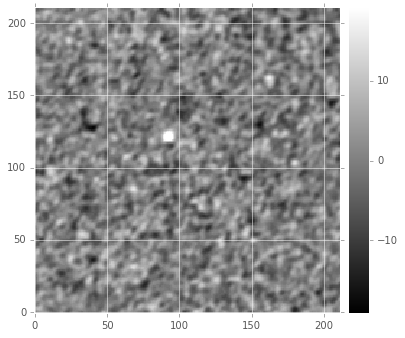

In [13]:
reload(dit)
testObj2 = testObj.clone()
testObj2.reverseImages()
result = testObj2.doALInStack(doPreConv=True, doDecorr=False)

fig = plt.figure(1, (6, 6))
dit.plotImageGrid((-result.subtractedExposure.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d],))

In [14]:
reload(dit)

testObj2 = testObj.clone()
testObj2.reverseImages()
result = testObj2.doALInStack(doPreConv=True, doDecorr=True)

No module named utils
LSSTSW has not been set up.
(21, 21) (21, 21)


(-3.7949898, 533.46674, -3200.8545, 4216.269)
24


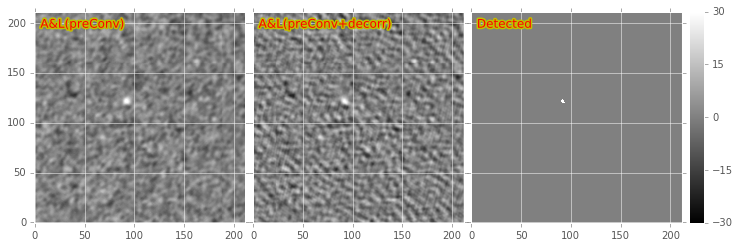

In [24]:
fig = plt.figure(1, (12, 12))
tmp = result.decorrelatedDiffim.getMaskedImage().getImage().getArray()
dstats = dit.computeClippedImageStats(tmp)
print dstats
tmp = (tmp - dstats[0]) / dstats[1]
print (tmp > 5.).sum() + (tmp < -5.).sum()

dit.plotImageGrid((-result.subtractedExposure.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d],
                   -result.decorrelatedDiffim.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d]/100.,
                  ((tmp > 5.)*-50. + (tmp < -5.)*50.)[x1d:x2d,y1d:y2d]), clim=(-30,30),
                 titles=['A&L(preConv)', 'A&L(preConv+decorr)', 'Detected'])

300.158514606


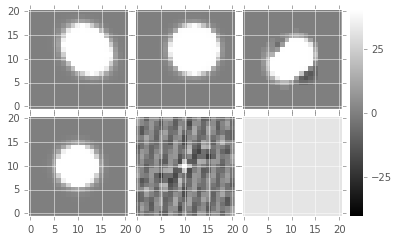

In [16]:
print dit.computeVarianceMean(testObj2.im1.asAfwExposure())
dit.plotImageGrid((testObj2.im1.psf, testObj2.im2.psf, result.kappaImg, result.preConvKernel, result.decorrelationKernel,))

(21, 21) (21, 21)
(22, 22) (22, 22)


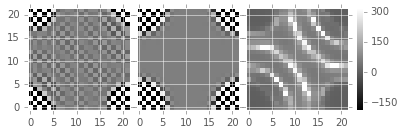

In [17]:
kappa = result.kappaImg
preConvKernel = result.preConvKernel
print kappa.shape, preConvKernel.shape

import scipy.fftpack
kappa = dit.fixOddKernel(kappa)
kft = scipy.fftpack.fft2(np.abs(kappa))

pc = dit.fixOddKernel(preConvKernel)
pcft = scipy.fftpack.fft2(pc)

print kappa.shape, pc.shape

svar = tvar = 300.
k2 = np.sqrt((svar + tvar) / (svar * np.abs(pcft)**2 + tvar * np.abs(kft)**2))

dit.plotImageGrid((kft.real, pcft.real, k2.real))

(22, 22) (22, 22)
0 253


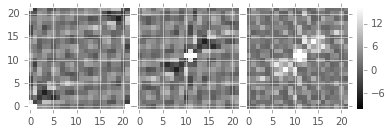

In [18]:
print kappa.shape, pc.shape
k2a = scipy.fftpack.fftshift(k2)
pck = scipy.fftpack.ifft2(k2a)
pck2 = scipy.fftpack.ifftshift(pck.real)
#print pck.real.shape, pck2.shape
#print np.unravel_index(np.argmax(pck.real), pck.real.shape)
print np.argmax(pck.real), np.argmax(pck2)
#print np.unravel_index(np.argmax(pck2), pck2)
dit.plotImageGrid((pck.real, pck2, np.abs(pck2)))

### Compare with ZOGY S_corr

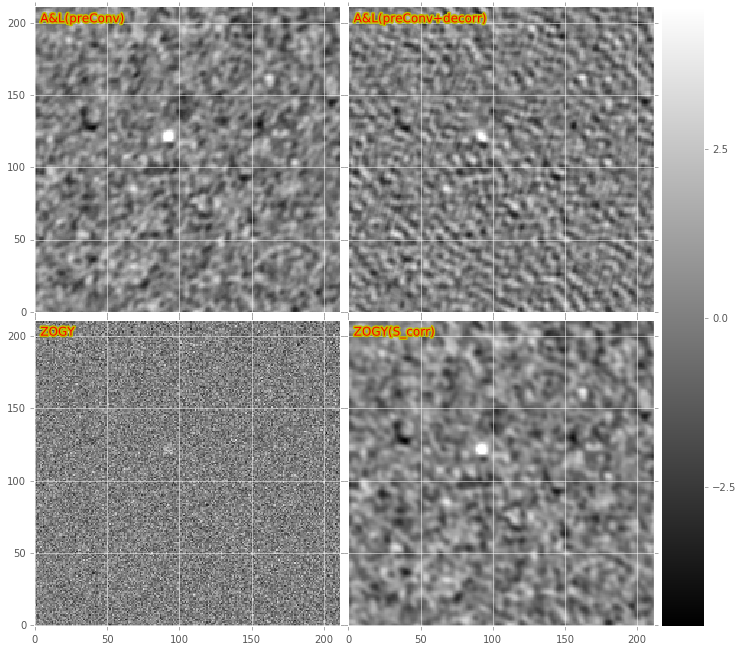

In [29]:
D_ZOGY = testObj2.doZOGY()

fig = plt.figure(1, (12, 12))
dit.plotImageGrid((-result.subtractedExposure.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d],
                   -result.decorrelatedDiffim.getMaskedImage().getImage().getArray()[x1d:x2d,y1d:y2d]/100.,
                   -D_ZOGY.im[x1d:x2d,y1d:y2d], -testObj2.S_corr_ZOGY.im[x1d:x2d,y1d:y2d]),
                 titles=['A&L(preConv)', 'A&L(preConv+decorr)', 'ZOGY', 'ZOGY(S_corr)'])